# import laibrairies

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
import xgboost as xgb


In [50]:
data=pd.read_csv('train.csv')
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [51]:
data.drop(columns='id',inplace=True)

In [52]:
data.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [53]:
data['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [54]:
data['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [55]:
data['onpromotion'].unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

In [56]:
data.dtypes

date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [57]:
data['date']=pd.to_datetime(data['date'])

In [58]:
data.dtypes

date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

In [59]:
train_data=data.set_index('date')

In [60]:
train_data.dtypes

store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [61]:
train_data.head()

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0
2013-01-01,1,BABY CARE,0.0,0
2013-01-01,1,BEAUTY,0.0,0
2013-01-01,1,BEVERAGES,0.0,0
2013-01-01,1,BOOKS,0.0,0


<AxesSubplot:xlabel='date'>

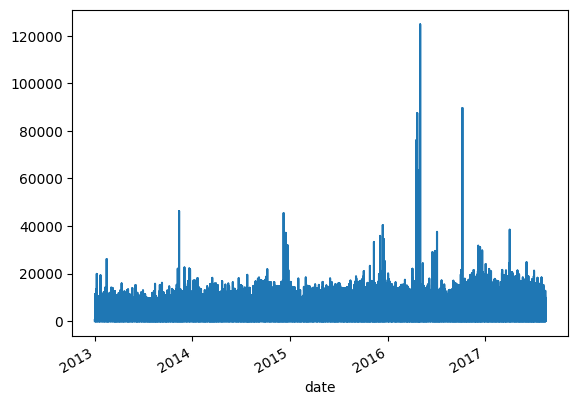

In [62]:
train_data['sales'].plot()

# Dealing with outliers

In [63]:
train_data.query('sales >40000')

,store_nbr,family,sales,onpromotion
date,,,,
2013-11-12,44,GROCERY I,46271.000,0
2014-12-08,35,GROCERY I,45361.000,3
2015-12-14,35,GROCERY I,40351.460,7
2016-04-18,45,GROCERY I,76090.000,38
2016-04-21,20,GROCERY I,87438.516,53
2016-04-21,45,GROCERY I,53874.000,44
2016-04-26,2,GROCERY I,63434.000,30
2016-05-02,2,GROCERY I,124717.000,59
2016-10-07,39,MEATS,89576.360,0


<AxesSubplot:xlabel='date'>

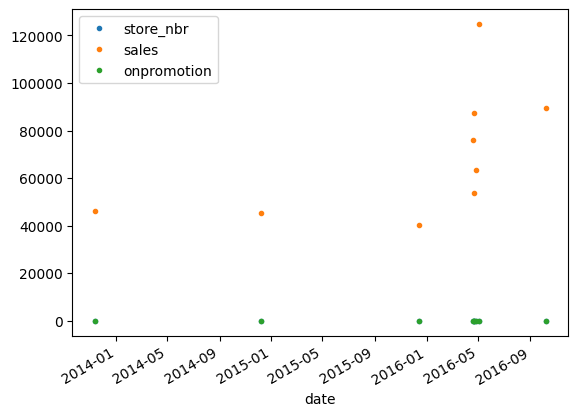

In [64]:
train_data.query('sales >40000').plot(style='.')

<AxesSubplot:xlabel='date'>

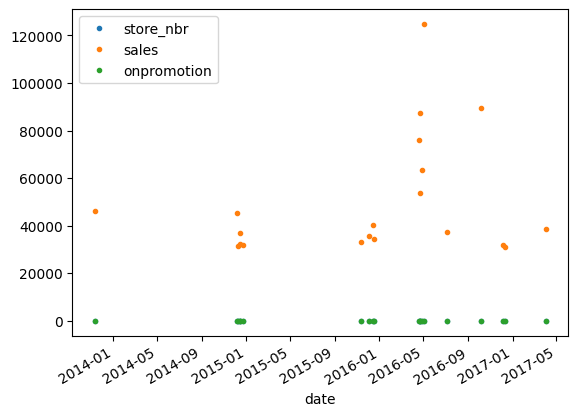

In [65]:
train_data.query('sales >30000').plot(style='.')

I dicided to consider the values >30000 as outliers, and I built new dataset based on that

In [66]:
train_data=train_data.query('sales <30000').copy()

<AxesSubplot:xlabel='date'>

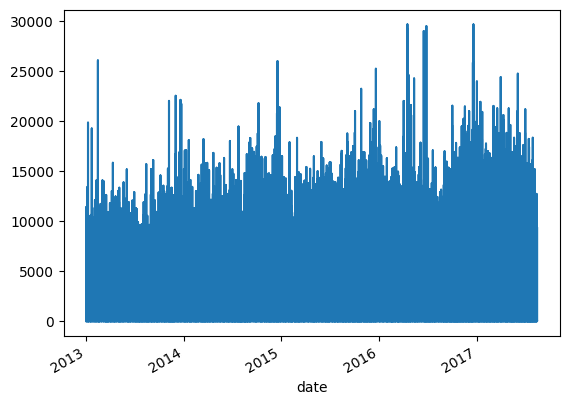

In [67]:
train_data['sales'].plot()

In [68]:
test_data=pd.read_csv('test.csv')

In [69]:
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [70]:
test_data.drop(columns='id',inplace=True)

In [71]:
test_data['date']=pd.to_datetime(test_data['date'])

In [72]:
test_data.dtypes

date           datetime64[ns]
store_nbr               int64
family                 object
onpromotion             int64
dtype: object

In [73]:
test_data=test_data.set_index('date')

In [74]:
test_data.head()

,store_nbr,family,onpromotion
date,,,
2017-08-16,1,AUTOMOTIVE,0
2017-08-16,1,BABY CARE,0
2017-08-16,1,BEAUTY,2
2017-08-16,1,BEVERAGES,20
2017-08-16,1,BOOKS,0


In [75]:
train_data.tail()



,store_nbr,family,sales,onpromotion
date,,,,
2017-08-15,9,POULTRY,438.133,0
2017-08-15,9,PREPARED FOODS,154.553,1
2017-08-15,9,PRODUCE,2419.729,148
2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
2017-08-15,9,SEAFOOD,16.000,0


In [76]:
def create_features(df):

    df['day']=df.index.dayofweek
    df['month']=df.index.month
    df['year']=df.index.year
    return df


In [77]:
train_data.head()

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0
2013-01-01,1,BABY CARE,0.0,0
2013-01-01,1,BEAUTY,0.0,0
2013-01-01,1,BEVERAGES,0.0,0
2013-01-01,1,BOOKS,0.0,0


In [78]:
train_data=create_features(train_data)

In [79]:
test_data=create_features(test_data)

In [80]:
test_data.head()

,store_nbr,family,onpromotion,day,month,year
date,,,,,,
2017-08-16,1,AUTOMOTIVE,0,2,8,2017
2017-08-16,1,BABY CARE,0,2,8,2017
2017-08-16,1,BEAUTY,2,2,8,2017
2017-08-16,1,BEVERAGES,20,2,8,2017
2017-08-16,1,BOOKS,0,2,8,2017


# Dealing with categorical Variables

In [81]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
train_data['family'] = encoder.fit_transform(train_data[['family']])

In [82]:
test_data['family']=encoder.transform(test_data[['family']])

In [83]:
test_data.head()

,store_nbr,family,onpromotion,day,month,year
date,,,,,,
2017-08-16,1,0.0,0,2,8,2017
2017-08-16,1,1.0,0,2,8,2017
2017-08-16,1,2.0,2,2,8,2017
2017-08-16,1,3.0,20,2,8,2017
2017-08-16,1,4.0,0,2,8,2017


In [84]:
features=['family','onpromotion','day','month']
X_train=train_data[features]
y_train=train_data['sales']
X_test=test_data[features]


In [85]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train)

[10:29:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 